# ta-target-mean

Mean instead of range 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("../data/BTCUSDT-hour-test-all-features.csv")

In [64]:
def get_target(span=200):
    """
    adds target to df. Target formula:
    w = next 200 hours
    close - (((max(w) - min(w))/2)+min(w))
    """
    acc = []
    df_len = len(df["close"])

    for i in range(len(df["close"])):

        if i+span < df_len:
            m = np.mean(df["close"][i+1:i+span])
            acc.append(m-df["close"][i])
        else:
            acc.append(None)

    return acc
        
        


In [65]:
df["close"][0:100]

0     4094.62
1     4093.00
2     4117.41
3     4115.41
4     4155.87
       ...   
95    4131.92
96    4113.58
97    4113.98
98    4132.09
99    4133.42
Name: close, Length: 100, dtype: float64

In [66]:
df["target"] = get_target()

In [67]:
df["ln_close"] = np.log(df["close"])

In [68]:
def divide(x, y):
    """divides x and y, returns None if either are None"""
    if not isinstance(x, float) or not isinstance(y, float) or y == 0:
        return None
    else:
        return x/y

def abs_ln(x):
    """returns ln, and -ln(abs(x)) if x is negative"""
    return np.log(abs(x)) if x>0 else -np.log(abs(x))


In [69]:
a = list(map(abs_ln, df["target"]))
b = np.log(df["close"])


In [70]:
df["target_new"] = list(map(divide, a, b)) 

In [71]:
def cutoff(low:float, high:float):
    """if target_new is within bounds, returns 0"""
    df["target_new"] = list(map(lambda x: 0 if low<x<high else 1 if x>0 else -1, df["target_new"]))

In [72]:
cutoff(-100.6, 0.60)

In [73]:
df_short = df[20000:30000]

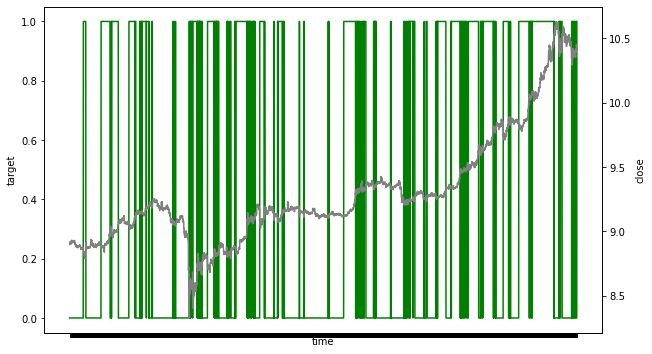

In [75]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(df_short.timestamp,
         df_short.target_new,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(df_short.timestamp,
         df_short.ln_close,
         color="gray")
ax2.set_ylabel("close")
plt.show()

In [74]:
df.to_csv("../data/BTCUSDT-hour-target-classification.csv", index=False)